# H2: SmallVessel Morphology Varies by Genotype

**Rationale:** SH2B3 regulates integrin signaling and actin cytoskeleton in endothelial cells, affecting adhesion and migration. Loss-of-function may alter vessel size, shape, and elongation.

**Metrics:** Area, Circularity, Solidity, Elongation (Max/Min diameter), Max diameter, Min diameter

> **Caveat:** With n=3–4 per group, these analyses are exploratory. Effect sizes are more informative than p-values.

In [1]:
import sys
sys.path.insert(0, '.')
from data_utils import *
setup_style()

df = load_data()
vessels = get_vessels(df)

# Derived metrics
vessels['Elongation'] = vessels['Max diameter µm'] / vessels['Min diameter µm'].replace(0, np.nan)

# Size categories
vessels['Size_Category'] = pd.cut(vessels['Area µm^2'],
    bins=[0, 50, 200, np.inf], labels=['Small (<50)', 'Medium (50-200)', 'Large (>200)'])

MORPH_COLS = ['Area µm^2', 'Circularity', 'Solidity', 'Elongation', 'Max diameter µm', 'Min diameter µm']
MORPH_LABELS = ['Area (µm²)', 'Circularity', 'Solidity', 'Elongation', 'Max diameter (µm)', 'Min diameter (µm)']

print(f"Total vessels: {len(vessels)}")
print(f"Vessels per genotype: {vessels.groupby('Genotype', observed=True).size().to_dict()}")
print(f"Vessels in Follicle: {(vessels['Region'] == 'Follicle').sum()}")

Total vessels: 386520
Vessels per genotype: {'C/C': 169973, 'C/T': 118730, 'T/T': 97817}
Vessels in Follicle: 22525


## Figure 1: Vessel-Level Distributions by Genotype (Violin)

*Visual comparison only — individual vessels are NOT independent units of analysis.*

/tmp/ipykernel_261539/582283647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, x='Genotype', y=col, order=GENO_ORDER,


/tmp/ipykernel_261539/582283647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, x='Genotype', y=col, order=GENO_ORDER,


/tmp/ipykernel_261539/582283647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, x='Genotype', y=col, order=GENO_ORDER,


/tmp/ipykernel_261539/582283647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, x='Genotype', y=col, order=GENO_ORDER,


/tmp/ipykernel_261539/582283647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, x='Genotype', y=col, order=GENO_ORDER,


/tmp/ipykernel_261539/582283647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, x='Genotype', y=col, order=GENO_ORDER,


Saved: analysis/figures/H2_morphology_violin.png


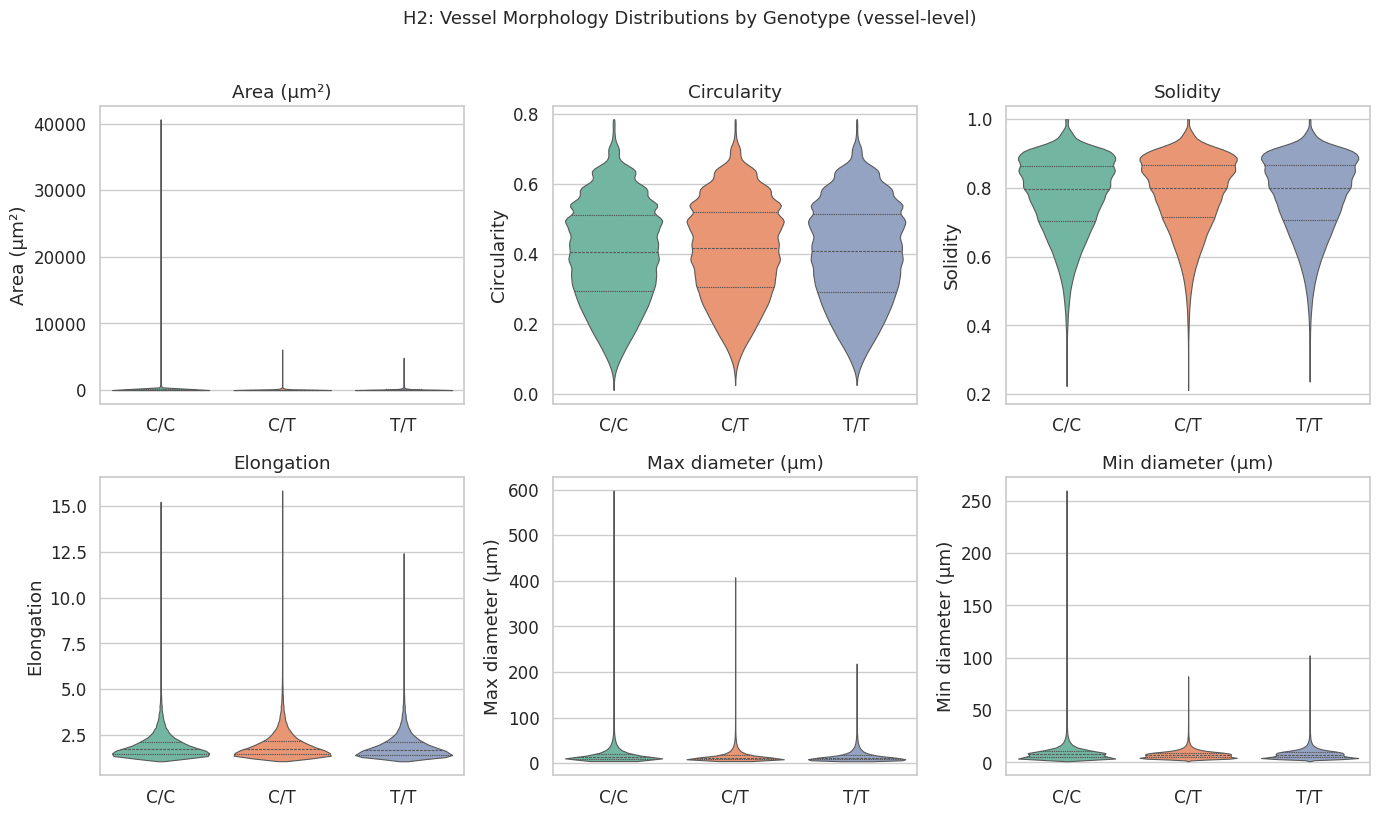

In [2]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

for ax, col, label in zip(axes.flat, MORPH_COLS, MORPH_LABELS):
    plot_data = vessels[vessels[col].notna()]
    sns.violinplot(data=plot_data, x='Genotype', y=col, order=GENO_ORDER,
                   palette=GENO_PALETTE, ax=ax, inner='quartile', cut=0, linewidth=0.8)
    ax.set_title(label)
    ax.set_xlabel('')
    ax.set_ylabel(label)

fig.suptitle('H2: Vessel Morphology Distributions by Genotype (vessel-level)', fontsize=13, y=1.02)
fig.tight_layout()
save_figure(fig, 'H2_morphology_violin')
plt.show()

## Figure 2: Per-Image Median Morphology by Genotype

/tmp/ipykernel_261539/4294950078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=img_morph, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261539/4294950078.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=img_morph, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261539/4294950078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=img_morph, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261539/4294950078.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

Saved: analysis/figures/H2_morphology_per_image.png


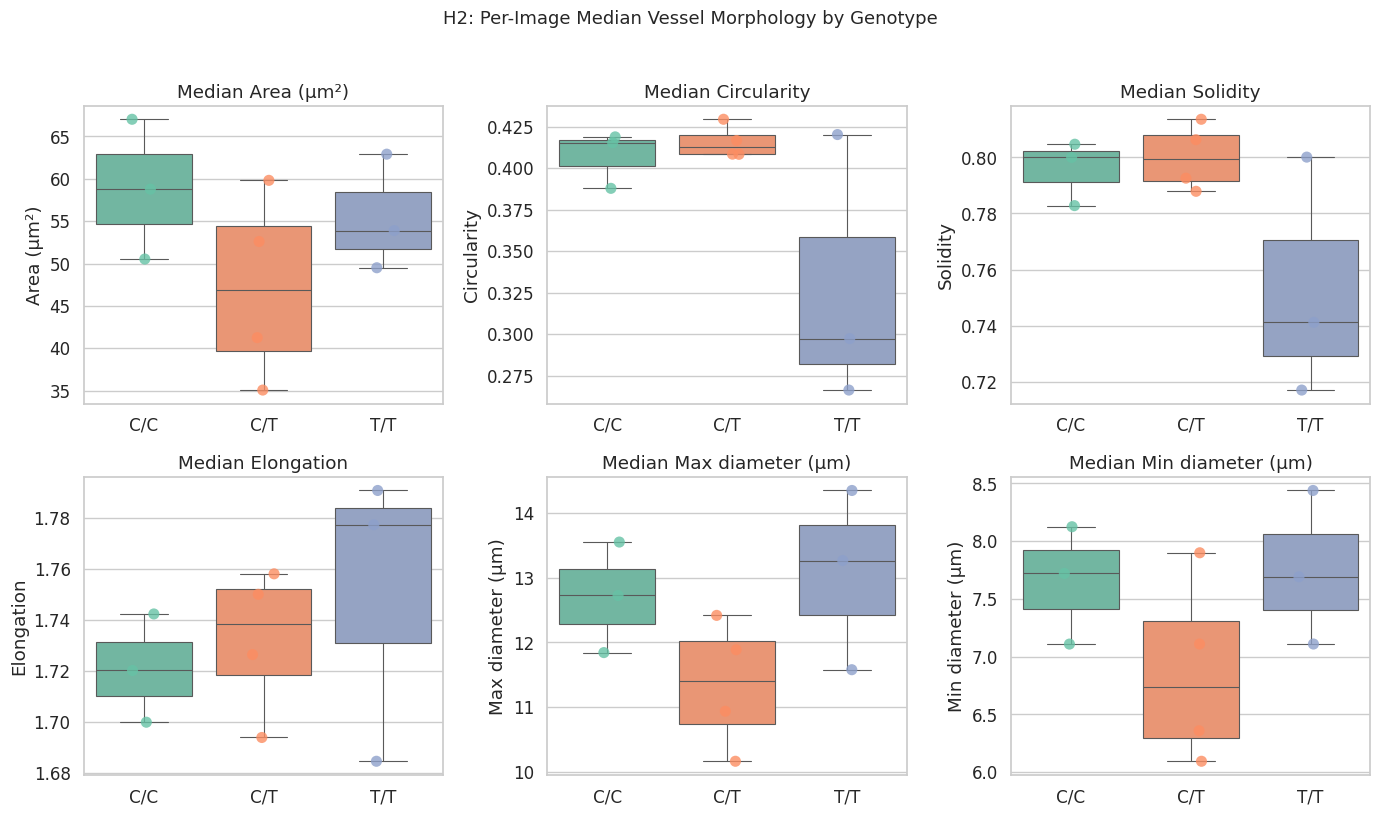

In [3]:
# Aggregate to per-image medians
img_morph = vessels.groupby(['Image', 'Sample', 'Genotype'], observed=True)[MORPH_COLS].median().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(14, 8))

for ax, col, label in zip(axes.flat, MORPH_COLS, MORPH_LABELS):
    sns.boxplot(data=img_morph, x='Genotype', y=col, order=GENO_ORDER,
                palette=GENO_PALETTE, ax=ax, linewidth=0.8, fliersize=0)
    sns.stripplot(data=img_morph, x='Genotype', y=col, order=GENO_ORDER,
                  palette=GENO_PALETTE, ax=ax, size=8, alpha=0.8)
    ax.set_title(f'Median {label}')
    ax.set_xlabel('')
    ax.set_ylabel(label)

fig.suptitle('H2: Per-Image Median Vessel Morphology by Genotype', fontsize=13, y=1.02)
fig.tight_layout()
save_figure(fig, 'H2_morphology_per_image')
plt.show()

## Figure 3: Follicle-Stratified Morphology

/tmp/ipykernel_261539/3598133954.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fol_img, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261539/3598133954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=fol_img, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261539/3598133954.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fol_img, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261539/3598133954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

/tmp/ipykernel_261539/3598133954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=fol_img, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261539/3598133954.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fol_img, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261539/3598133954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=fol_img, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261539/3598133954.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

Saved: analysis/figures/H2_follicle_morphology.png


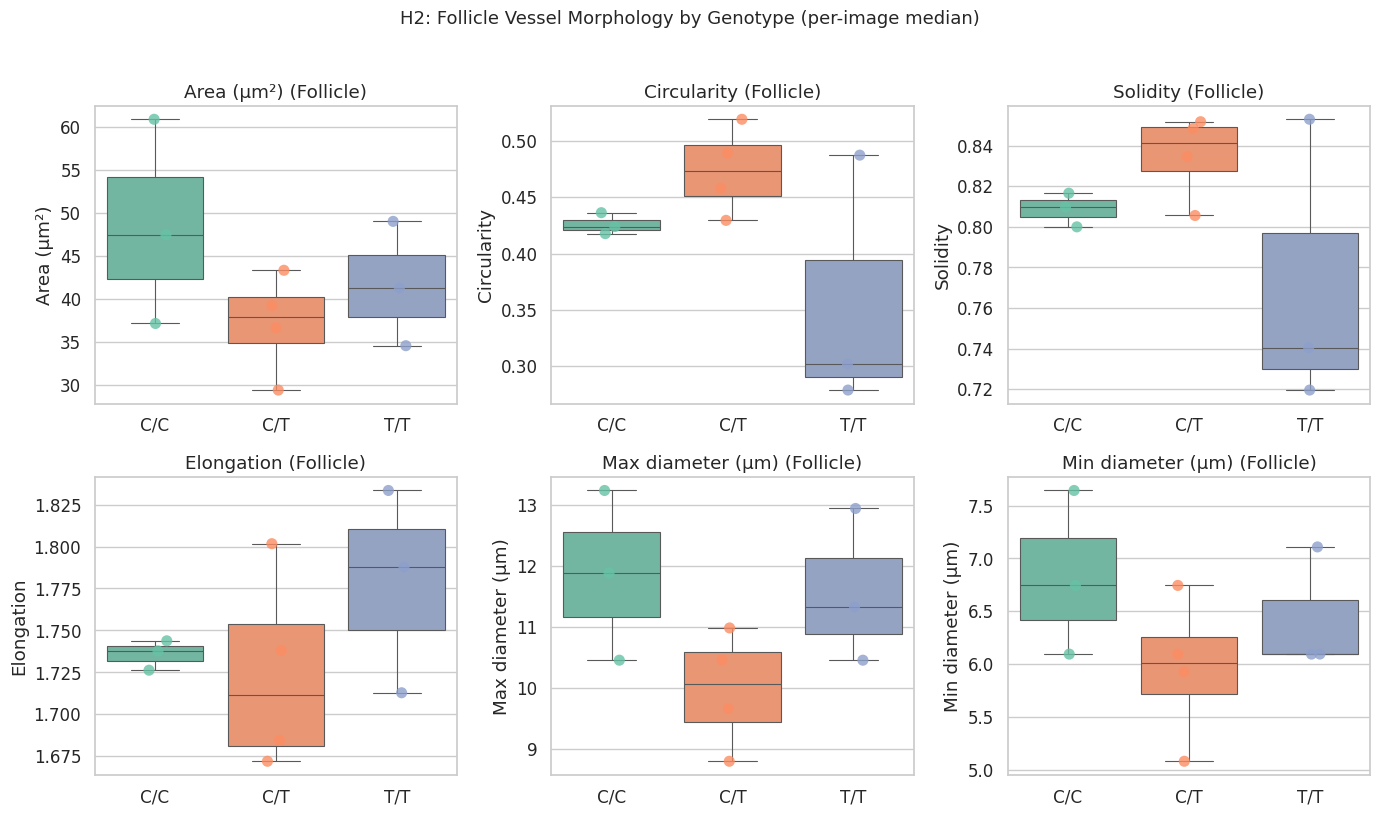

In [4]:
fol_vessels = vessels[vessels['Region'] == 'Follicle']
fol_img = fol_vessels.groupby(['Image', 'Sample', 'Genotype'], observed=True)[MORPH_COLS].median().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(14, 8))

for ax, col, label in zip(axes.flat, MORPH_COLS, MORPH_LABELS):
    sns.boxplot(data=fol_img, x='Genotype', y=col, order=GENO_ORDER,
                palette=GENO_PALETTE, ax=ax, linewidth=0.8, fliersize=0)
    sns.stripplot(data=fol_img, x='Genotype', y=col, order=GENO_ORDER,
                  palette=GENO_PALETTE, ax=ax, size=8, alpha=0.8)
    ax.set_title(f'{label} (Follicle)')
    ax.set_xlabel('')
    ax.set_ylabel(label)

fig.suptitle('H2: Follicle Vessel Morphology by Genotype (per-image median)', fontsize=13, y=1.02)
fig.tight_layout()
save_figure(fig, 'H2_follicle_morphology')
plt.show()

## Figure 4: ECDF — Area and Circularity in Follicle

Saved: analysis/figures/H2_ecdf_area_circularity.png


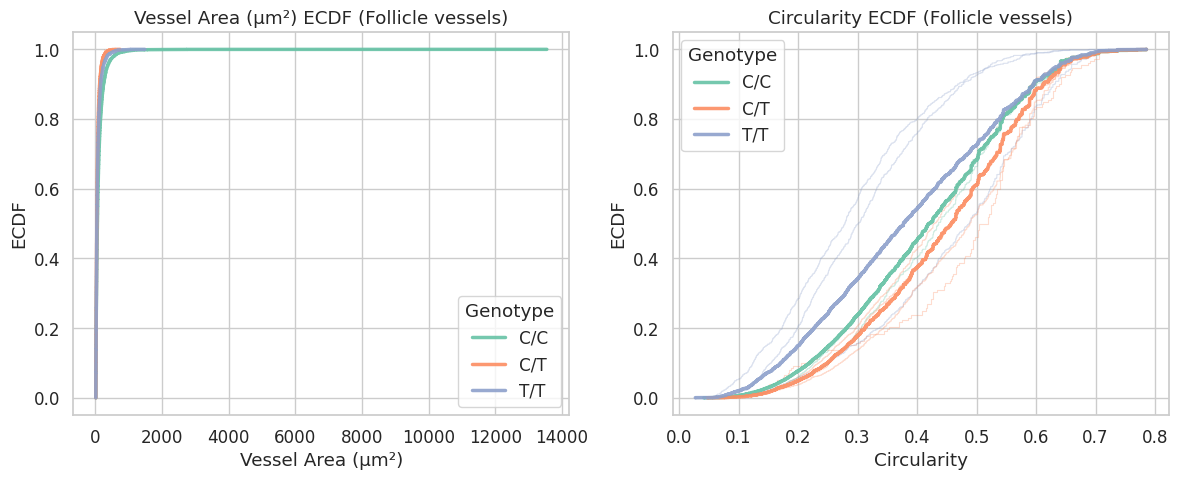

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, col, label in zip(axes, ['Area µm^2', 'Circularity'],
                                ['Vessel Area (µm²)', 'Circularity']):
    # Thin lines per image
    for _, row in fol_img.iterrows():
        img_data = fol_vessels[fol_vessels['Image'] == row['Image']][col].dropna().sort_values()
        if len(img_data) < 5:
            continue
        ecdf_y = np.arange(1, len(img_data) + 1) / len(img_data)
        ax.step(img_data.values, ecdf_y, color=GENO_PALETTE[row['Genotype']],
                alpha=0.3, linewidth=0.8)

    # Bold per-genotype
    for geno in GENO_ORDER:
        geno_data = fol_vessels[fol_vessels['Genotype'] == geno][col].dropna().sort_values()
        if len(geno_data) < 5:
            continue
        ecdf_y = np.arange(1, len(geno_data) + 1) / len(geno_data)
        ax.step(geno_data.values, ecdf_y, color=GENO_PALETTE[geno],
                linewidth=2.5, alpha=0.9, label=geno)

    ax.set_xlabel(label)
    ax.set_ylabel('ECDF')
    ax.set_title(f'{label} ECDF (Follicle vessels)')
    ax.legend(title='Genotype')

fig.tight_layout()
save_figure(fig, 'H2_ecdf_area_circularity')
plt.show()

## Figure 5: Vessel Size Category Proportions

/tmp/ipykernel_261539/2152194891.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  size_pivot = size_counts.pivot_table(index=['Sample', 'Genotype'],


Saved: analysis/figures/H2_size_categories.png


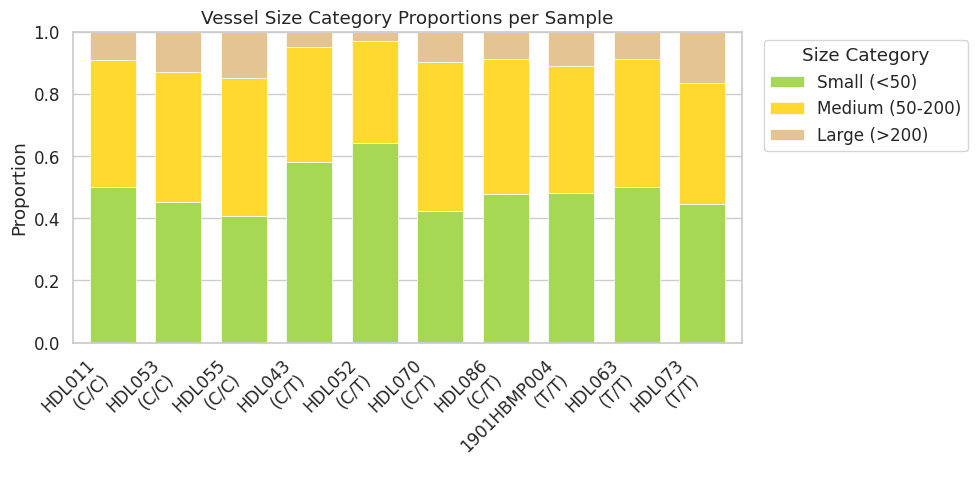

In [6]:
# Size category proportions per image
size_counts = vessels.groupby(['Sample', 'Genotype', 'Size_Category'], observed=True).size().reset_index(name='Count')
size_total = size_counts.groupby(['Sample', 'Genotype'], observed=True)['Count'].sum().reset_index(name='Total')
size_counts = size_counts.merge(size_total)
size_counts['Proportion'] = size_counts['Count'] / size_counts['Total']

# Pivot for stacked bar
size_pivot = size_counts.pivot_table(index=['Sample', 'Genotype'],
                                      columns='Size_Category', values='Proportion', fill_value=0)
size_pivot = size_pivot.sort_index(level='Genotype')

size_colors = {'Small (<50)': '#a6d854', 'Medium (50-200)': '#ffd92f', 'Large (>200)': '#e5c494'}

fig, ax = plt.subplots(figsize=(10, 5))
size_pivot.plot(kind='bar', stacked=True,
                color=[size_colors.get(c, '#999') for c in size_pivot.columns],
                ax=ax, width=0.7, edgecolor='white', linewidth=0.5)

labels = [f"{s}\n({g})" for s, g in size_pivot.index]
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Proportion')
ax.set_xlabel('')
ax.set_title('Vessel Size Category Proportions per Sample')
ax.legend(title='Size Category', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_ylim(0, 1)

fig.tight_layout()
save_figure(fig, 'H2_size_categories')
plt.show()

## Summary Tables

In [7]:
# Per-image morphology summary
morph_summary = []
for col, label in zip(MORPH_COLS, MORPH_LABELS):
    s = img_morph.groupby('Genotype', observed=True)[col].agg(['count', 'mean', 'std', 'median']).round(4)
    s['Metric'] = label
    morph_summary.append(s.reset_index())

morph_df = pd.concat(morph_summary, ignore_index=True)
morph_df.columns = ['Genotype', 'N', 'Mean', 'SD', 'Median', 'Metric']
morph_df = morph_df[['Metric', 'Genotype', 'N', 'Mean', 'SD', 'Median']]

save_table(morph_df, 'H2_morphology_summary')
display(morph_df)

Saved: analysis/tables/H2_morphology_summary.csv


,Metric,Genotype,N,Mean,SD,Median
0,Area (µm²),C/C,3,58.7800,8.2500,58.7800
1,Area (µm²),C/T,4,47.1825,11.1236,46.9250
2,Area (µm²),T/T,3,55.4333,6.8369,53.8900
3,Circularity,C/C,3,0.4074,0.0170,0.4154
4,Circularity,C/T,4,0.4158,0.0099,0.4126
5,Circularity,T/T,3,0.3280,0.0814,0.2974
6,Solidity,C/C,3,0.7958,0.0115,0.8000
7,Solidity,C/T,4,0.8001,0.0119,0.7994
8,Solidity,T/T,3,0.7527,0.0427,0.7412
9,Elongation,C/C,3,1.7207,0.0212,1.7200


In [8]:
# Statistical tests (per-image medians as unit of analysis)
all_stats = []
for col, label in zip(MORPH_COLS, MORPH_LABELS):
    # All regions
    all_stats.append(full_stats_table(img_morph, col, label=f'{label} (all regions)'))
    # Follicle only
    all_stats.append(full_stats_table(fol_img, col, label=f'{label} (Follicle)'))

stats_df = pd.concat(all_stats, ignore_index=True)
save_table(stats_df, 'H2_statistical_tests')
display(stats_df)

Saved: analysis/tables/H2_statistical_tests.csv


,Test,Metric,Statistic,p,Effect_Size
0,Kruskal-Wallis,Area (µm²) (all regions),1.800000,0.406570,
1,Mann-Whitney (C/C vs C/T),Area (µm²) (all regions),9.000000,0.400000,r=-0.500
2,Mann-Whitney (C/C vs T/T),Area (µm²) (all regions),6.000000,0.700000,r=-0.333
3,Mann-Whitney (C/T vs T/T),Area (µm²) (all regions),3.000000,0.400000,r=0.500
4,Spearman dosage,Area (µm²) (all regions),-0.134840,0.710342,rho=-0.135
5,Kruskal-Wallis,Area (µm²) (Follicle),2.090909,0.351532,
6,Mann-Whitney (C/C vs C/T),Area (µm²) (Follicle),10.000000,0.228571,r=-0.667
7,Mann-Whitney (C/C vs T/T),Area (µm²) (Follicle),6.000000,0.700000,r=-0.333
8,Mann-Whitney (C/T vs T/T),Area (µm²) (Follicle),4.000000,0.628571,r=0.333
9,Spearman dosage,Area (µm²) (Follicle),-0.224733,0.532481,rho=-0.225
